In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from helpers.plotting import *


In [2]:
project_id = "eta"
path_to_compiled_data = f"/pscratch/sd/r/rmastand/dimuonAD/compiled_data/{project_id}"

codes_list = ["DATA"]

uncut_data = {}
for code in codes_list:
    with open(f"{path_to_compiled_data}/{code}", "rb") as ifile:
        uncut_data[code] = pickle.load(ifile)
    
    
    print(code, list(uncut_data[codes_list[0]].keys()), uncut_data[code][list(uncut_data[code].keys())[0]].shape)
 
vars_to_plot = list(uncut_data[codes_list[0]].keys())

DATA ['muon_pt', 'amuon_pt', 'muon_eta', 'amuon_eta', 'muon_iso03', 'amuon_iso03', 'muon_iso04', 'amuon_iso04', 'jet_pt', 'jet_eta', 'jet_mass', 'dimu_pt', 'dimu_eta', 'dimu_mass', 'dimu_mass_samesign'] (30701271,)


In [3]:
# small cut on jet pt (necessary for BSM_XYY)
"""
jet_pt_cut = 0
btag_cut = 0.0

dimu_M_cut_low = 0
dimu_M_cut_high = 1000000

filters_nano, filters_ed = {}, {}

for code in uncut_data.keys():
    
    filters_nano[code] = (uncut_data[code]["dijet_pt"]>jet_pt_cut)\
                        &(uncut_data[code]["jet0_btag"]>=btag_cut)\
                        &(uncut_data[code]["jet1_btag"]>=btag_cut)\
                        &(uncut_data[code]["dimu_mass"]>=dimu_M_cut_low)\
                        &(uncut_data[code]["dimu_mass"]<dimu_M_cut_high)
"""

'\njet_pt_cut = 0\nbtag_cut = 0.0\n\ndimu_M_cut_low = 0\ndimu_M_cut_high = 1000000\n\nfilters_nano, filters_ed = {}, {}\n\nfor code in uncut_data.keys():\n    \n    filters_nano[code] = (uncut_data[code]["dijet_pt"]>jet_pt_cut)                        &(uncut_data[code]["jet0_btag"]>=btag_cut)                        &(uncut_data[code]["jet1_btag"]>=btag_cut)                        &(uncut_data[code]["dimu_mass"]>=dimu_M_cut_low)                        &(uncut_data[code]["dimu_mass"]<dimu_M_cut_high)\n'

In [4]:


colors_dict = {
    "DATA":"purple", 
    "BSM_HAA":"red", 
    "SM_SIM":"blue",
    "wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full":"red",
    "cmssim":"blue"
    }





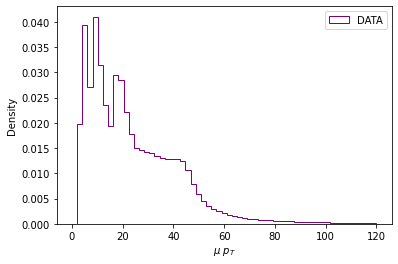

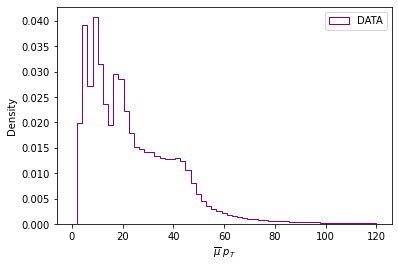

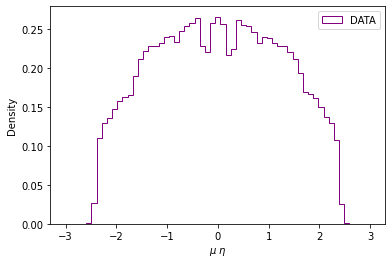

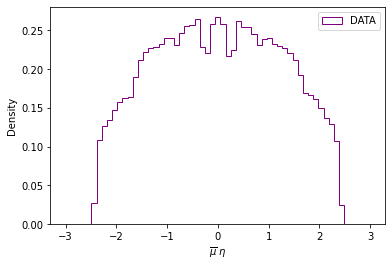

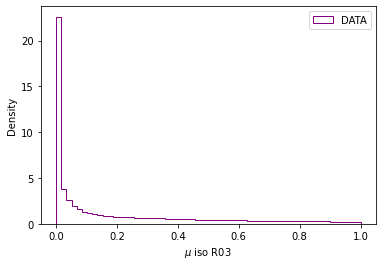

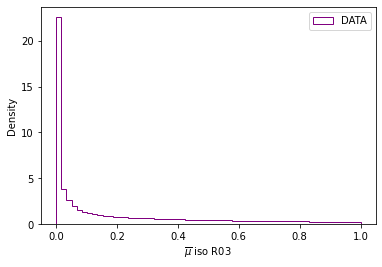

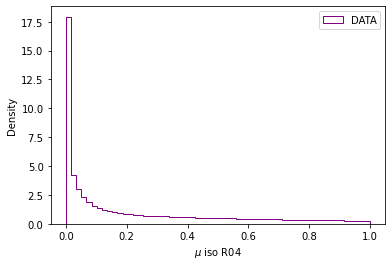

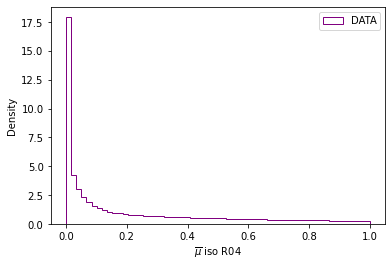

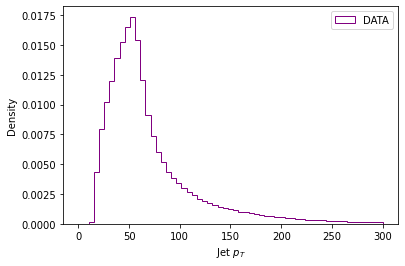

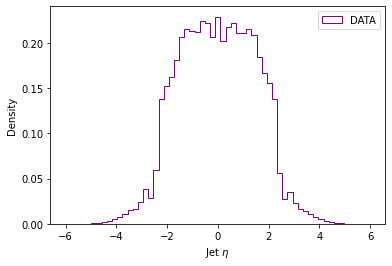

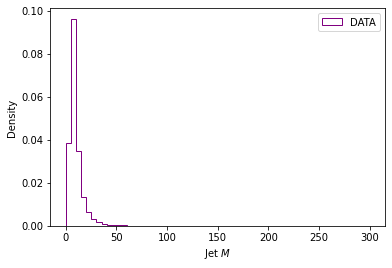

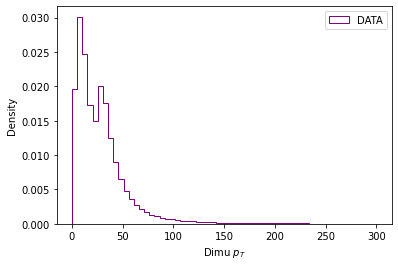

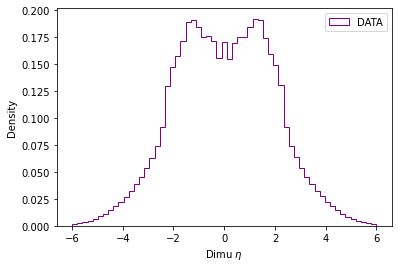

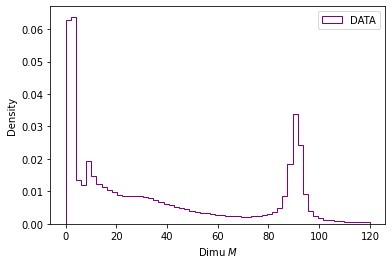

KeyError: 'dimu_mass_samesign'

<Figure size 432x288 with 0 Axes>

In [5]:

for var in vars_to_plot:
    plt.figure()
    
    # left: new s, b
    for code in uncut_data.keys():
        
        
        
        plt.hist(uncut_data[code][var], bins = feature_bins[var], 
                 histtype = "step", density = True, label = code[:10], color = colors_dict[code])
        
 
        
    plt.xlabel(feature_labels[var])
    plt.ylabel("Density")
    plt.legend()
    plt.show()


Look at the Samesign muon spectru

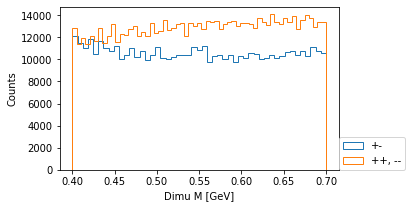

In [13]:


plt.figure(figsize = (5,3))

plt.hist(uncut_data["DATA"]["dimu_mass"], bins = np.linspace(start, stop, 50), 
        histtype = "step", label = f"+-")

plt.hist(uncut_data["DATA"]["dimu_mass_samesign"], bins = np.linspace(start, stop, 60), 
        histtype = "step", label = "++, --")

#plt.axvline(0.547)

plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()



In [ ]:
muon_iso_cuts = np.arange(0, 1, 0.1) # anti-isolation cut -- want muon iso to be ABOVE this, which means more junk
dimuon_pt_cuts = [0, 10, 20, 30, 40, 50, 60, 70]

isoc = 0
ptc = 0


plt.figure(figsize = (5,3))
    
start = 0.4
stop = 0.7

for isoc in muon_iso_cuts:
    
    
    loc_filter = (uncut_data["DATA"]["muon_iso04"]>=isoc) &(uncut_data["DATA"]["amuon_iso04"]>=isoc) &(uncut_data["DATA"]["dimu_pt"]>=ptc) 
    plt.hist(uncut_data["DATA"]["dimu_mass"][loc_filter], bins = np.linspace(start, stop, 50), 
            histtype = "step", label = f"mu iso R04 > {round(isoc, 2)}")



#plt.axvline(0.547)

plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()

